### Creació base de dades a partir de les taules de MIMIC-III

<font size="2">
Consideracions:<br>
- No totes les variables mantindran el nom de les taules d'on provenen, algunes variables seran assignades amb noms més explicatius.<br>
- D'algunes variables explicatives s'han deixat propostes de codificacions però que no han sigut aplicades, ja que es pot fer un cop es tingui tot el data set acabat.
</font>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

#### Carreguem les taules

In [2]:
patients = pd.read_csv("PATIENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")
icustays = pd.read_csv("ICUSTAYS.csv")
callout = pd.read_csv("CALLOUT.csv")
transfers = pd.read_csv("TRANSFERS.csv")
services = pd.read_csv("SERVICES.csv")
inputevents = pd.read_csv("INPUTEVENTS_MV.csv")

In [211]:
labevents = pd.read_csv("LABEVENTS.csv")

In [3]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


#### Taula ICUSTAYS

Aquesta taula defineix una fila per cada estada a la UCI de cada pacient, on les estades són identificades de manera única pel *icustay_id*.

Aquesta taula està relacionada amb **Patients** amb *subject_id* i amb **Admissions** amb *hadm_id*.

##### Consideracions importants

- L'*icustay_id* no ha sigut generat a partir de cap identificador de les dades crues. Ja que a la base de dades de l'hospital i de la UCI la informació no està intrínsicament vinculada, i per tant, no existeix un identificador únic per estada a la UCI.
    
- La taula **Icustays** deriva de la taula **Transfers**. En particular, agrupa la informació de la taula **Transfers** en base a l'identificador *icustays_id*, i exclou aquelles files on no existeix un *icustay_id*.

- La **clau primària** és l'identificador *icustays_id*.
<br>La clau primària en base de dades és una variable que identifica de manera única la informació, en el nostre cas, de cada pacient. Si aquesta variable fos eliminada podriem tenir dues files amb la mateixa informació pel mateix pacient, cosa que no seria cert perquè serien diferents estades a la UCI
- Les **claus foràneas** són: *subject_id* i *hadm_id*. 
<br>Les claus foràneas en base de dades són variables que relacionen una taula amb altres, i a més a més, aquestes claus foràneas són claus primàries d'aquestes altres taules.

<br>**Aquesta taula serà utilitzada per agafar els pacients que han estat com a mínim un cop a la UCI entre 2008 i 2012.**

#### Descartem aquells pacients que van ser recollits amb el sistema informàtic CareVue, ens quedem només amb els pacients de Metavision. 

In [4]:
icustays8_12 = icustays[icustays["DBSOURCE"] == "metavision"]

In [5]:
icustays_unique = icustays8_12.drop_duplicates(subset="SUBJECT_ID")

In [6]:
#número de pacients enregistrat en el sistema Metavision (pacients entre 2008-2012)
num_pacients = icustays_unique["SUBJECT_ID"].shape
print(f"Tenim {num_pacients[0]} pacients enregistrat en el sistema metavision")

Tenim 17710 pacients enregistrat en el sistema metavision


#### De les taules Admissions i Patients agafem els pacients entre 2008-2012 

In [7]:
admissions_icu = admissions.loc[admissions["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
admissions_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
12,33,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1
13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
15,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1


In [8]:
patients_icu = patients.loc[patients["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
patients_icu.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
15,249,266,F,2090-12-17 00:00:00,NaN,NaN,NaN,0
22,628,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,NaN,1
28,634,671,M,2148-03-27 00:00:00,NaN,NaN,NaN,0
44,650,689,F,2128-12-27 00:00:00,NaN,NaN,NaN,0


#### Transformacions de la taula PATIENTS

Aquesta taula indica els pacients que estan associats com a mínim amb una admissió a la UCI. Aquesta està relacionada amb les taules **Admissions** i **Icustays** a través del *Subject_id*.

##### Consideracions importants
 - **DOB** han sigut desplaçades per pacients d'edat > 89 anys. La mediana d'edat per pacients dels quals l'edat ha sigut desplaçada és 91,4.

 - Subject_id és la *clau candidata*, és a dir, que si s'elimina aquesta columna podria haver files amb valors duplicats.
 
 
Ens quedem amb les variables d'interés, en aquest cas:
 - Subject_id: Identificador únic per cada pacient.
 - Gender
 - Expire_flag (0 si el pacient viu, 1 si mort)
 - DOB (Date Of Birth)
 - DOD (Date of Death)
 - DOD_HOSP: Si el pacient a mort a l'hospital el valor és el mateix que el de la columna DOD, si no és NaN.

In [9]:
patients_df = pd.DataFrame()
patients_df["subject_id"] = patients_icu["SUBJECT_ID"]

In [10]:
patients_df["gender"] = patients_icu["GENDER"]

In [11]:
patients_df["is_dead"] = patients_icu["EXPIRE_FLAG"]

In [12]:
patients_df["DOB"] = patients_icu["DOB"]

In [13]:
patients_df["DOD"] = patients_icu["DOD"]

In [ ]:
patients_df["is_dead_hosp"] = patients_icu["DOD_HOSP"] 

In [16]:
patients_df["is_dead_hosp"] = patients_icu["DOD_HOSP"].apply(lambda x: 1 if pd.notna(x) else 0)

In [17]:
patients_df.head()

,subject_id,gender,is_dead,DOB,DOD,is_dead_hosp
0,249,F,0,2075-03-13 00:00:00,NaN,0
15,266,F,0,2090-12-17 00:00:00,NaN,0
22,665,M,1,2052-05-20 00:00:00,2120-02-04 00:00:00,1
28,671,M,0,2148-03-27 00:00:00,NaN,0
44,689,F,0,2128-12-27 00:00:00,NaN,0


#### Transformacions necessàries per la taula ADMISSIONS

Aquesta taula conté informació sobre les admissions dels pacients a l'hospital. Cada pacient és assignat un *hadm_id* per cada estada al hospital. Està relacionada amb la taula **Patients** a través del *subject_id*.

##### Consideracions importants

 - Les dades de la taula han sigut recollides de les bases de dades d'admissions, discharge i transfers del hospital. Normalment, es fa referència a aquest tipus de dades com dades 'ADT'.

 - Es contempla informació de donants d'organs que han mort durant l'estada al hospital. Solen ser admissions al hospital molt curtes, on la Length Of Stay pot tenir valors negatius. A més a més, el temps de la mort concorda amb el temps de la mort de l'última admissió del pacient.

 - La **clau primaria** d'aquesta taula és la columna *hadm_id*.
 
 - La **clau forànea**, és a dir, els valors d'aquesta taula utilitzats per relacionar-la amb altres taules és la columna *subject_id*.

Ens quedem amb les següents variables: 

 - Subject_ID
 - ADMITTIME: Data i temps en el que el pacient va ser admès al hospital.
 - ADMISSION_TYPE: Tipus d'admissió, pot ser:
    - Urgent
    - Elective
    - Newborn 
    - Emergency.
    
 - DISCHARGE_LOCATION: 
    - Home
    - Home Health Care
    - Dead/Expired
    - SNF(Skilled Nursing Facility).
    
 - ADMIT_LOCATION:
    - Phys referal/normal deli: El pacient és derivat a un altre tipus de metge però sense ser una urgència.
    - Emergency room admit.
    - Clinic referral/premature: El pacient és transferit a un altre centre de manera urgent per canvis en l'estat d'aquest.
    - Transfer from other hosp: El pacient ha sigut transferit des d'un altre centre mèdic.
    - TRSF within this facility

In [18]:
admissions_df = pd.DataFrame()

In [19]:
admissions_df["subject_id"] = admissions_icu["SUBJECT_ID"]

In [20]:
admissions_df["hadm_id"] = admissions_icu["HADM_ID"]

In [21]:
admissions_df["admit_datetime"] = admissions_icu["ADMITTIME"]

Proposta de codificació del tipus d'admissió al hospital: 
- 1 si és una intervenció mèdica o quirúrgica planificada no d'urgències.
- 2 si urgències o emergència.

In [52]:
#adm_type_arr = np.array(admissions_icu["ADMISSION_TYPE"])
#adm_type_arr[adm_type_arr == "ELECTIVE"] = 1
#adm_type_arr[adm_type_arr != 1] = 2

In [22]:
admissions_df["admission_type"] = admissions_icu["ADMISSION_TYPE"]

Codificació del lloc d'admissió al hospital
- 1 si PHYS REFERRAL/NORMAL DELI, és a dir, si el pacient és derivat a un altre tipus de metge però sense ser una urgència.
- 2 si TRANSFER FROM HOSP/EXTRAM o TRANSFER FROM OTHER HEALT, és a dir, el pacient ha sigut transferit des d'un altre centre mèdic.
- 3 si CLINIC REFERRAL/PREMATURE, és a dir, si el pacient és transferit a un altre centre de manera urgent per canvis en l'estat d'aquest.
- 4 si EMERGENCY ROOM ADMIT
- 5 si TRANSFER FROM SKILLED NUR, és a dir, el pacient és transferit des d'una altre unitat de cuidats especialitzats (normalment, per pacients en rehabilitació o amb malalties de llarga durada)
- 6 si TRSF WITHIN THIS FACILITY

In [70]:
"""
admloc_type = np.array(admissions_icu["ADMISSION_LOCATION"])

for tp in range(len(admit_location_types)):
    if admit_location_types[tp] == "TRANSFER FROM OTHER HEALT":
        admloc_type[admloc_type == admit_location_types[tp]] = 2
    if tp == 6:
        admloc_type[admloc_type == admit_location_types[tp]] = tp
    else:
        admloc_type[admloc_type == admit_location_types[tp]] = tp+1
"""

In [23]:
# Com que l'etiqueta "Transfer from hosp/extram" té el mateix significat que "Transfer from other health",
# la canviem a "Transfer from other hosp" per tots els pacients que tinguin el valor d'alguna de les dues anteriors.

admloc_type = np.array(admissions_icu["ADMISSION_LOCATION"])
admloc_type[admloc_type == "TRANSFER FROM HOSP/EXTRAM"] = "TRANSFER FROM OTHER HOSP"
admloc_type[admloc_type == "TRANSFER FROM OTHER HEALT"] = "TRANSFER FROM OTHER HOSP"
admissions_df["admit_location"] = admloc_type

In [24]:
admissions_df["discharge_location"] = admissions_icu["DISCHARGE_LOCATION"]

In [25]:
admissions_df.head()

,subject_id,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
1,23,152223,2153-09-03 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
2,23,124321,2157-10-18 19:34:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE
12,34,115799,2186-07-18 16:46:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME
13,34,144319,2191-02-23 05:23:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
15,36,182104,2131-04-30 07:15:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE


In [90]:
# p249 = admissions_df[admissions_df["subject_id"] == 249]
# p249

,subject_id,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
540,249,116935,2149-12-17 20:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF
541,249,149546,2155-02-03 20:16:00,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP
542,249,158975,2156-04-27 15:33:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF


Unim la taula PATIENTS i ADMISSIONS

In [26]:
admis_with_patients_df = patients_df.merge(admissions_df, on="subject_id", how="right")
admis_with_patients_df.head()

,subject_id,gender,is_dead,DOB,DOD,is_dead_hosp,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
0,23,M,0,2082-07-17 00:00:00,NaN,0,152223,2153-09-03 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
1,23,M,0,2082-07-17 00:00:00,NaN,0,124321,2157-10-18 19:34:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE
2,34,M,1,1886-07-18 00:00:00,2192-01-30 00:00:00,0,115799,2186-07-18 16:46:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME
3,34,M,1,1886-07-18 00:00:00,2192-01-30 00:00:00,0,144319,2191-02-23 05:23:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
4,36,M,0,2061-08-17 00:00:00,NaN,0,182104,2131-04-30 07:15:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE


Fem el càlcul de l'edat dels pacients en cada estada amb l'admit_datetime i la DOB i esborrem aquestes dues columnes

In [27]:
# Canviem el datetime object de "admit_datetime" i "DOB" per poder calcular la diferència.
admis_with_patients_df["age"] = admis_with_patients_df.apply(lambda x: (datetime.strptime(x["admit_datetime"], "%Y-%m-%d %H:%M:%S") - datetime.strptime(x["DOB"], "%Y-%m-%d %H:%M:%S")).days//365, axis=1)

In [28]:
# Els pacients que tenen edats => a 300 anys els hi restem 210 anys per trobar l'edat correcta dels pacients amb edats >= 90
admis_with_patients_df["age"] = admis_with_patients_df["age"].apply(lambda x: x-210 if x>=300 else x)

In [29]:
# Eliminem les columnes de "DOB" i admit_datetime perquè ja no les necessitem
admis_with_patients_df.drop(["DOB", "admit_datetime"], axis=1, inplace=True)

In [30]:
admis_with_patients_df.head()

,subject_id,gender,is_dead,DOD,is_dead_hosp,hadm_id,admission_type,admit_location,discharge_location,age
0,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71
1,23,M,0,NaN,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75
2,34,M,1,2192-01-30 00:00:00,0,115799,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME,90
3,34,M,1,2192-01-30 00:00:00,0,144319,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,94
4,36,M,0,NaN,0,182104,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,69


#### Transformacions necessàries per la taula CALLOUT

Aquesta taula conté informació sobre els pacients que estaven preparats per ser donats d'alta a la UCI, i si realment és van donar d'alta. Quan a un pacient li arriba la hora d'abandonar la UCI, se sol dir que el pacient és "called out". Aquest process contempla les següents passes: 

   1. Registrar que el pacient està preparat per deixar la UCI i les precaucions especials que cal prendre si es requereixen. <br>
   2. L'aprovació d'un superior demanant un llit fora de la UCI.<br>
   3. Un periode de temps considerat per fer la transferència del pacient fora de la UCI.<br>
   4. La resolució: Si finalment el pacient abandona la UCI o no.

La taula **Callout** està relacionada amb la taula **Patients** a través del *subject_id* i la taula **Admissions** a través del *hadm_id*.

##### Consideracions importants

 - No hi ha dades en aquesta taula per tots els pacients adults.

 - La informació d'aquesta taula mai es troba per nounats.

 - La **clau primària** és *row_id*.

 - Les **claus foràneas** són: *subject_id* i *hadm_id*.<br>

<br>Ens quedem amb les següents variables: 

 - HADM_ID: Identificador de l'admissió al hospital del pacient.
 - CURR_CAREUNIT: Tipus de UCI actual del pacient.
 
     - CCU: Coronary care unit
     - CSRU: Cardiac surgery recovery unit
     - MICU: Medical intensive care unit
     - NICU: Neonatal intensive care unit
     - NWARD: Neonatal ward
     - SICU: Surgical intensive care unit
     - TSICU: Trauma/surgical intensive care unit

 - CALLOUT_SERVICE: Servei mèdic al que el pacient és donat d'alta.
 
      - CCU: Coronary Care Unit
      - CMED: Cardiac Medical
      - CSURG: Cardiac Surgery
      - ENT: Department that looks after patiens who have diseases or symptoms affecting Ear, Nose, and Throat.
      - GU: Genitourinary
      - GYN: Gynecology
      - MED: Medical
      - NB: Newborn
      - NBB: Newborn Nursery
      - NMED: Neonatal Medical
      - NSURG: Neonatal Surgical
      - OBS: Obstetrics
      - OMED: Obstetric Medical
      - ORTHO: Orthopedic
      - PSURG: Plastic Surgery
      - PSYCH: Psychiatry
      - SURG: Surgical
      - TRAUM: Trauma
      - TSURG: Trauma Surgery
      - VSURG: Vascular Surgery

 - CALLOUT_OUTCOME: 
    - Cancelled: Si el procés ha sigut cancel·lat, el pacient roman a la UCI.
    - Discharged: El pacient ha sigut donat d'alta de la UCI

 - OUTCOMETIME: Temps i data en les que es va realitzar el callout.

In [31]:
# Agafem els pacients de la taula callout que han sigut enregistrats entre 2008-2012 (sistema Metavision)
callout_icu = callout.loc[callout["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
#callout_icu[callout_icu["SUBJECT_ID"] == 249]
callout_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0,...,Inactive,Discharged,29.0,Acknowledged,2146-10-05 13:16:55,2146-10-05 13:16:55,2146-10-05 13:24:00,2146-10-05 18:55:22,2146-10-05 15:27:44,NaN
26,179,357,174486,23.0,MICU,23.0,MICU,1,MED,0,...,Inactive,Cancelled,NaN,Acknowledged,2197-12-24 12:13:26,2197-12-25 07:54:05,2197-12-25 07:04:25,2197-12-25 07:54:05,NaN,NaN
27,180,357,174486,23.0,NaN,54.0,MICU,1,MED,0,...,Inactive,Discharged,54.0,Revised,2197-12-26 11:21:41,2197-12-26 14:56:20,NaN,2197-12-26 15:40:05,NaN,NaN
28,181,357,145674,50.0,NaN,3.0,MICU,1,NMED,1,...,Inactive,Discharged,3.0,Acknowledged,2198-08-02 20:23:27,2198-08-02 20:23:27,2198-08-03 06:58:58,2198-08-04 02:10:04,NaN,NaN
29,182,357,101651,7.0,NaN,55.0,CCU,1,CCU,0,...,Inactive,Discharged,55.0,Acknowledged,2199-10-20 17:36:30,2199-10-20 17:36:30,2199-10-20 17:58:24,2199-10-21 10:40:05,NaN,NaN


In [32]:
callout_df = pd.DataFrame()

In [33]:
callout_df["subject_id"] = callout_icu["SUBJECT_ID"]

In [34]:
callout_df["hadm_id"] = callout_icu["HADM_ID"]

In [35]:
callout_df["current_careunit"] = callout_icu["CURR_CAREUNIT"]

In [36]:
callout_df["discharge_careunit"] = callout_icu["CALLOUT_SERVICE"]

In [37]:
callout_df["is_discharged"] = callout_icu.loc[:, "CALLOUT_OUTCOME"].apply(lambda x: 0 if x.lower()=="cancelled" else 1)

In [38]:
callout_df["icu_out_time"] = callout_icu["OUTCOMETIME"]

In [39]:
num_discharged = np.array(callout_df["is_discharged"])
print(f"Número de pacients on la variable is_discharge = 1: {np.sum(num_discharged)}")
print(f"Número de pacients totals de la taula callout: {callout_df.shape[0]}")

Número de pacients on la variable is_discharge = 1: 20559
Número de pacients totals de la taula callout: 23779


In [40]:
# Eliminem aquelles files on el pacient no ha sigut transferit, és a dir is_discharged = 0
callout_df = callout_df[callout_df["is_discharged"] == 1]

In [41]:
# Esborrem la columna is_discharged perquè no proporciona informació rellevant, ja que l'estat de is_discharged de tots els pacients és el mateix.
callout_df = callout_df.drop(columns=["is_discharged"])

In [42]:
callout_df.head()

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time
0,854,175684,MICU,MED,2146-10-05 18:55:22
27,357,174486,MICU,MED,2197-12-26 15:40:05
28,357,145674,MICU,NMED,2198-08-04 02:10:04
29,357,101651,CCU,CCU,2199-10-21 10:40:05
32,357,117876,SICU,NMED,2200-01-07 21:40:04


In [43]:
# Ordena per files segons els valors de les columnes de "hadm_id" i "icu_out_time" de manera ascendent.
callout_df = callout_df.sort_values(["hadm_id", "icu_out_time"], axis=0)

In [44]:
# Comptem quants cops apareix el mateix "hadm_id" per saber quants cops ha sigut ingressat a la UCI un pacient a la mateixa estada al hospital
callout_df["callout_id"] = callout_df.groupby(["hadm_id"]).cumcount()+1

In [45]:
# Calculem un id únic per estades a la UCI
callout_df["callout_id"] = callout_df.apply(lambda x: str(x["hadm_id"])+"_"+str(x["callout_id"]), axis=1)

In [46]:
callout_df.head()

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
24784,58526,100001,MICU,MED,2117-09-15 18:14:40,100001_1
19431,54610,100003,MICU,MED,2150-04-19 14:25:08,100003_1
22156,55853,100010,SICU,GU,2109-12-12 12:28:10,100010_1
31925,87977,100011,TSICU,TRAUM,2177-09-09 17:11:45,100011_1
24997,60039,100012,CSRU,CSURG,2177-03-18 00:57:27,100012_1


In [47]:
# Comprovem per algun pacient que s'hagit fet bé la creació d'aquest identificador
paciente_249 = callout_df[callout_df["subject_id"] == 249]
paciente_249

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
67,249,149546,MICU,MED,2155-02-05 18:55:23,149546_1
68,249,149546,TSICU,NMED,2155-02-11 16:25:30,149546_2
70,249,158975,MICU,CCU,2156-05-03 18:56:13,158975_1
71,249,158975,MICU,SURG,2156-05-11 19:43:38,158975_2


#### Transformacions necessàries per la taula TRANSFERS

Aquesta taula indica els serveis de l'hospital pels que ha passat el pacient, i la informació de cada transferència d'un servei mèdic a un altre.

Està relacionada amb les taules: **Patients**, a través del *subject_id*; **Admissions**, a través del *hadm_id*, i amb la taula **Icustays**, a través de l'identificador *icustays_id*.

##### Consideracions importants

 - La taula **Icustays** deriva d'aquesta.

 - Les ICUs estan definides segons diferents *wardID*'s les quals estan associades amb una ICU.

 - Les ICUs han anat canviant durant els anys de localitzacions a l'hospital, per tant, un *wardID* pot fer referència a una ICU pel pacient A però no fa referència a la mateixa ICU per un altre pacient B. Per tant, aquesta variable i les que estiguin relacionada amb aquesta no seran considerades.

 - La **clau primària** és l'identificador *row_id*.

 - Les **claus foràneas** són: *subject_id*, *hadm_id* i *icustays_id*.


<br>Ens quedem amb les següents variables: 

 - HADM_ID: ID de l'admissió a l'hospital del pacient.
 - SUBJECT_ID: ID únic pel pacient.
 - EVENTYPE:
     - Admit: Si el pacient pacient és admès.
     - Transfer: El pacient es transferit dins del mateix hospital.
     - Discharge: El pacient se li dona l'alta de l'hospital.
 - PREV_CAREUNIT: La UCI en la que es trobava prèviament el pacient.
 - CURR_CAREUNIT: La UCI on actualment es troba el pacient.
 - INTIME: Temps i data en la que el pacient ha entrar a la curr_careunit.
 - OUTTIME: Temps i data en el que el pacient ha sortit de la curr_careunit
 - LOS: Lenght of Stay, mesurat en hores.

 - Tipus de CAREUNITS:
     - CCU: Coronary care unit
     - CSRU: Cardiac surgery recovery unit
     - MICU: Medical intensive care unit
     - NICU: Neonatal intensive care unit
     - NWARD: Neonatal ward
     - SICU: Surgical intensive care unit
     - TSICU: Trauma/surgical intensive care unit

In [48]:
#Agafem els pacients entre 2008 i 2012
transfers_icu = transfers.loc[transfers["DBSOURCE"]== "metavision"]
transfers_icu = transfers_icu.loc[transfers_icu["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
transfers_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15
5,662,111,155897,249202.0,metavision,transfer,NaN,MICU,32.0,52.0,2144-07-01 06:28:29,2144-07-01 08:07:16,1.65
6,663,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 08:07:16,2144-07-01 08:13:51,0.11
7,664,111,155897,249202.0,metavision,transfer,NaN,MICU,32.0,23.0,2144-07-01 08:13:51,2144-07-01 17:56:31,9.71


In [49]:
transfers_df = pd.DataFrame()

In [50]:
transfers_df["subject_id"] = transfers_icu["SUBJECT_ID"]

In [51]:
transfers_df["hadm_id"] = transfers_icu["HADM_ID"]

In [52]:
transfers_df["event_type"] = transfers_icu["EVENTTYPE"]

In [53]:
transfers_df["prev_careunit"] = transfers_icu["PREV_CAREUNIT"]

In [54]:
transfers_df["current_careunit"] = transfers_icu["CURR_CAREUNIT"]

In [55]:
transfers_df["in_time"] = transfers_icu["INTIME"]

In [56]:
transfers_df["out_time"] = transfers_icu["OUTTIME"]

In [57]:
transfers_df["LOS"] = transfers_icu["LOS"]

In [58]:
# Ordena per files segons els valors de les columnes de "hadm_id" i "out_time" de manera ascendent.
transfers_df = transfers_df.sort_values(["hadm_id", "out_time"], axis=0)

In [59]:
# Volem crear l'identificador callout_id per poder fer la unió entre la taula transfers i callout.
# Primer creem una variable booleana ("should_have_id") que indicarà com "True" els callouts d'una UCI a un altre servei mèdic que no sigui el mateix tipus de UCI
# o directament, cap UCI. En cas contrari, serà "False".
transfers_df["should_have_id"] = transfers_df.apply(lambda x: False if pd.isna(x["prev_careunit"]) or x["prev_careunit"] == x["current_careunit"] else True, axis=1)

In [60]:
# Agrupem la taula per "hadm_id" i comptem els callouts d'interés, aquells on la variable should_have_id = True.
transfers_df["callout_id"] = transfers_df.groupby('hadm_id')['should_have_id'].transform(lambda x: x.cumsum())

In [61]:
# Creem l'identificador per les transferències d'interés, i a la resta els hi assignem NaN
transfers_df["callout_id"] = transfers_df.apply(lambda x: np.nan if not x["should_have_id"] else str(x["hadm_id"])+"_"+str(int(x["callout_id"])), axis=1)

In [62]:
transfers_df.head()

,subject_id,hadm_id,event_type,prev_careunit,current_careunit,in_time,out_time,LOS,should_have_id,callout_id
193492,58526,100001,admit,NaN,MICU,2117-09-11 11:47:35,2117-09-11 12:51:56,1.07,False,NaN
193493,58526,100001,transfer,MICU,MICU,2117-09-11 12:51:56,2117-09-15 17:57:14,101.09,False,NaN
193494,58526,100001,transfer,MICU,NaN,2117-09-15 17:57:14,2117-09-17 16:46:20,46.82,True,100001_1
193495,58526,100001,discharge,NaN,NaN,2117-09-17 16:46:20,NaN,NaN,False,NaN
203051,54610,100003,admit,NaN,MICU,2150-04-17 15:35:42,2150-04-17 15:51:17,0.26,False,NaN


In [63]:
#Observem la informació d'un pacient en concret per veure que hem aconseguit el que voliem
transfers_df[transfers_df["subject_id"] == 249]

,subject_id,hadm_id,event_type,prev_careunit,current_careunit,in_time,out_time,LOS,should_have_id,callout_id
2043,249,149546,admit,NaN,MICU,2155-02-03 20:17:29,2155-02-05 18:34:02,46.28,False,NaN
2044,249,149546,transfer,MICU,NaN,2155-02-05 18:34:02,2155-02-07 16:57:52,46.40,True,149546_1
2045,249,149546,transfer,NaN,NaN,2155-02-07 16:57:52,2155-02-07 18:51:16,1.89,False,NaN
2046,249,149546,transfer,NaN,TSICU,2155-02-07 18:51:16,2155-02-11 16:00:39,93.16,False,NaN
2047,249,149546,transfer,TSICU,NaN,2155-02-11 16:00:39,2155-02-11 18:45:05,2.74,True,149546_2
2048,249,149546,transfer,NaN,NaN,2155-02-11 18:45:05,2155-02-14 11:16:26,64.52,False,NaN
2049,249,149546,discharge,NaN,NaN,2155-02-14 11:16:26,NaN,NaN,False,NaN
2050,249,158975,admit,NaN,NaN,2156-04-27 15:33:52,2156-04-30 13:36:21,70.04,False,NaN
2051,249,158975,transfer,NaN,NaN,2156-04-30 13:36:21,2156-04-30 13:49:31,0.22,False,NaN
2052,249,158975,transfer,NaN,NaN,2156-04-30 13:49:31,2156-04-30 14:21:38,0.54,False,NaN


In [64]:
# Comprovem que aquest callout_id concorda entre les dues taules per aquest pacient
callout_df[callout_df["subject_id"] == 249]

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
67,249,149546,MICU,MED,2155-02-05 18:55:23,149546_1
68,249,149546,TSICU,NMED,2155-02-11 16:25:30,149546_2
70,249,158975,MICU,CCU,2156-05-03 18:56:13,158975_1
71,249,158975,MICU,SURG,2156-05-11 19:43:38,158975_2


### Unim la taula _transfers_ amb _callout_

In [65]:
transfers_callout_df = transfers_df.merge(callout_df, on=["subject_id", "hadm_id", "callout_id"], how="left", suffixes=("_transfers", "_callout"))

In [66]:
transfers_callout_df.head()

,subject_id,hadm_id,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS,should_have_id,callout_id,current_careunit_callout,discharge_careunit,icu_out_time
0,58526,100001,admit,NaN,MICU,2117-09-11 11:47:35,2117-09-11 12:51:56,1.07,False,NaN,NaN,NaN,NaN
1,58526,100001,transfer,MICU,MICU,2117-09-11 12:51:56,2117-09-15 17:57:14,101.09,False,NaN,NaN,NaN,NaN
2,58526,100001,transfer,MICU,NaN,2117-09-15 17:57:14,2117-09-17 16:46:20,46.82,True,100001_1,MICU,MED,2117-09-15 18:14:40
3,58526,100001,discharge,NaN,NaN,2117-09-17 16:46:20,NaN,NaN,False,NaN,NaN,NaN,NaN
4,54610,100003,admit,NaN,MICU,2150-04-17 15:35:42,2150-04-17 15:51:17,0.26,False,NaN,NaN,NaN,NaN


In [67]:
# Canviem l'objecte dels elements de les columnes "icu_out_time_*" a pandas datetime. 
transfers_callout_df[['in_time', 'icu_out_time']] = transfers_callout_df[['in_time', 'icu_out_time']].apply(pd.to_datetime)

Comprovem que els valors del temps quan s'efectuen els callouts i les transferències siguin molt petites

In [68]:
# Calculem la diferència entre els elements de les columnes "icu_out_time" i "in_time", sabent que normalment el "in_time" és una mica menor al de
#"icu_out_time".
diff_icu_outtime = pd.DataFrame()
diff_icu_outtime["difference"] = transfers_callout_df['icu_out_time'] - transfers_callout_df['in_time']

In [69]:
# Pels valors que son NaN els substituim per 0
diff_icu_outtime.fillna(pd.Timedelta(seconds=0))

,difference
0,0 days 00:00:00
1,0 days 00:00:00
2,0 days 00:17:26
3,0 days 00:00:00
4,0 days 00:00:00
...,...
99014,0 days 00:00:00
99015,0 days 00:00:00
99016,0 days 00:00:00
99017,0 days 00:00:00


Veiem que hi ha molts pocs valors on la diferència és més gran d'hora i mitja.


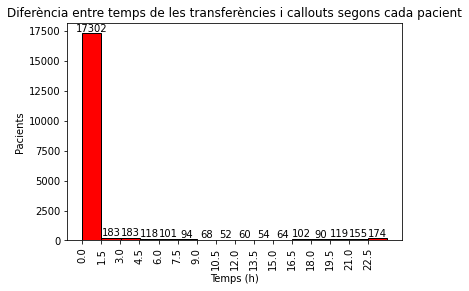

In [70]:
# Mostrem la frequencia de valors faltants segons els valors de la diferència en segons.
my_hist = diff_icu_outtime["difference"].dt.seconds
#my_hist.plot(kind='hist', color='blue', edgecolor='black', bins=50)
counts, edges, bars = plt.hist(my_hist, bins=16, ec="black", lw=1, color="red", align="mid")
plt.bar_label(bars)
plt.xlabel("Temps (h)")
plt.ylabel("Pacients")
plt.xticks(np.arange(0, 86400, step=5400), labels= np.arange(0.,24.,step=1.5), rotation=90)
plt.title("Diferència entre temps de les transferències i callouts segons cada pacient")
print("Veiem que hi ha molts pocs valors on la diferència és més gran d'hora i mitja.")

De moment aquests pacients no els eliminem, perquè sempre estem a temps de fer-ho. De totes maneres, ens quedarem amb el "in_time" de les transferències ja que reflexa els temps entre totes les transferències no només aquelles que s'han fet des d'una ICU.

In [71]:
transfers_callout_df["current_careunit_transfers"] = transfers_callout_df.apply(lambda x: x["discharge_careunit"] if pd.notna(x["callout_id"]) else x["current_careunit_transfers"], axis=1)

In [72]:
# Comprovació de què ha la informació de discharge_careunit s'ha passat correctament a la columna de current_careunit_transfers
transfers_callout_df[transfers_callout_df["subject_id"] == 249]

,subject_id,hadm_id,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS,should_have_id,callout_id,current_careunit_callout,discharge_careunit,icu_out_time
48625,249,149546,admit,NaN,MICU,2155-02-03 20:17:29,2155-02-05 18:34:02,46.28,False,NaN,NaN,NaN,NaT
48626,249,149546,transfer,MICU,MED,2155-02-05 18:34:02,2155-02-07 16:57:52,46.40,True,149546_1,MICU,MED,2155-02-05 18:55:23
48627,249,149546,transfer,NaN,NaN,2155-02-07 16:57:52,2155-02-07 18:51:16,1.89,False,NaN,NaN,NaN,NaT
48628,249,149546,transfer,NaN,TSICU,2155-02-07 18:51:16,2155-02-11 16:00:39,93.16,False,NaN,NaN,NaN,NaT
48629,249,149546,transfer,TSICU,NMED,2155-02-11 16:00:39,2155-02-11 18:45:05,2.74,True,149546_2,TSICU,NMED,2155-02-11 16:25:30
48630,249,149546,transfer,NaN,NaN,2155-02-11 18:45:05,2155-02-14 11:16:26,64.52,False,NaN,NaN,NaN,NaT
48631,249,149546,discharge,NaN,NaN,2155-02-14 11:16:26,NaN,NaN,False,NaN,NaN,NaN,NaT
57778,249,158975,admit,NaN,NaN,2156-04-27 15:33:52,2156-04-30 13:36:21,70.04,False,NaN,NaN,NaN,NaT
57779,249,158975,transfer,NaN,NaN,2156-04-30 13:36:21,2156-04-30 13:49:31,0.22,False,NaN,NaN,NaN,NaT
57780,249,158975,transfer,NaN,NaN,2156-04-30 13:49:31,2156-04-30 14:21:38,0.54,False,NaN,NaN,NaN,NaT


In [73]:
transfers_callout_df.drop(["should_have_id", "callout_id", "current_careunit_callout", "discharge_careunit", "icu_out_time"], axis=1, inplace=True)

In [74]:
transfers_callout_df.head()

,subject_id,hadm_id,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS
0,58526,100001,admit,NaN,MICU,2117-09-11 11:47:35,2117-09-11 12:51:56,1.07
1,58526,100001,transfer,MICU,MICU,2117-09-11 12:51:56,2117-09-15 17:57:14,101.09
2,58526,100001,transfer,MICU,MED,2117-09-15 17:57:14,2117-09-17 16:46:20,46.82
3,58526,100001,discharge,NaN,NaN,2117-09-17 16:46:20,NaN,NaN
4,54610,100003,admit,NaN,MICU,2150-04-17 15:35:42,2150-04-17 15:51:17,0.26


Fem la unió de les taules *admis\_with\_patients\_df* i *transfers\_callout\_df*

In [75]:
final_df = admis_with_patients_df.merge(transfers_callout_df, on=["subject_id", "hadm_id"], how="left", suffixes=("_admis_pat", "_transcall"))

In [76]:
final_df.head()

,subject_id,gender,is_dead,DOD,is_dead_hosp,hadm_id,admission_type,admit_location,discharge_location,age,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS
0,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN
1,23,M,0,NaN,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75,admit,NaN,NaN,2157-10-18 19:34:59,2157-10-21 11:40:38,64.09
2,23,M,0,NaN,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75,transfer,NaN,SICU,2157-10-21 11:40:38,2157-10-22 16:08:48,28.47
3,23,M,0,NaN,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75,transfer,SICU,NSURG,2157-10-22 16:08:48,2157-10-22 22:05:47,5.95
4,23,M,0,NaN,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75,transfer,NaN,NaN,2157-10-22 22:05:47,2157-10-25 14:04:10,63.97


#### Transformacions necessàries per la taula INPUTEVENTS_MV

Aquesta taula conté informació sobre l'administració de diferents medicaments o substàncies al pacient.

Està relacionada amb les taules: 
- **Patients**, a través del *subject_id*
- **Admissions**, a través del *hadm_id*
- **Icustays**, a través de l'identificador *icustays_id*.
- **D_items** amb *ITEMID*
- **Caregivers** amb *CGID*

##### Consideracions importants

 - El temps final d'administració sempre serà considerat com el temps en el que s'ha començat a administrar + un minut.

 - La **clau primària** és *row_id*

 - Les **claus foràneas** són: *subject_id*, *hadm_id*,*icustays_id*, *item_id* i *CGID*.


<br>De moment ens quedem només amb la variable **WEIGHT**(Kg) del pacient. 

In [77]:
inputevents_df = pd.DataFrame()

In [78]:
# Agafem un subset de la taula on cada fila correspon a un únic pacient.
inputevents_unique = inputevents.drop_duplicates(subset="SUBJECT_ID")

In [79]:
inputevents_df["subject_id"] = inputevents["SUBJECT_ID"]

In [80]:
inputevents_df["weight"] = inputevents["PATIENTWEIGHT"]

In [81]:
inputevents_df.head()

,subject_id,weight
0,27063,83.2
1,27063,83.2
2,27063,83.2
3,27063,83.2
4,27063,83.2


In [82]:
final_df = final_df.merge(inputevents_df, on=["subject_id"], how="left")

In [83]:
final_df.head()

,subject_id,gender,is_dead,DOD,is_dead_hosp,hadm_id,admission_type,admit_location,discharge_location,age,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS,weight
0,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN,66.8
1,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN,66.8
2,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN,66.8
3,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN,66.8
4,23,M,0,NaN,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71,NaN,NaN,NaN,NaT,NaN,NaN,66.8


In [85]:
services.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB
